<a href="https://colab.research.google.com/github/WendyParra/Inteligencia-Artificial-Parra/blob/main/PerceptronIris_Tarea_PARRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

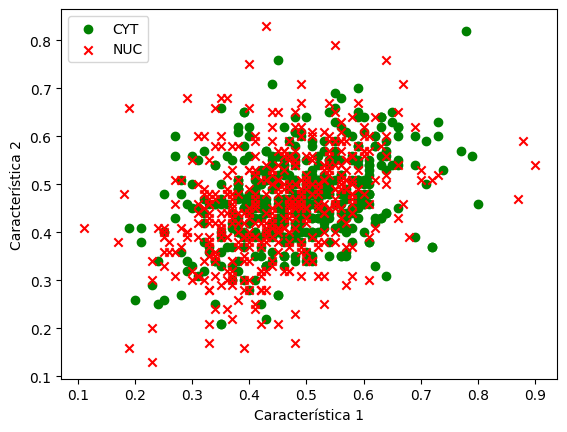

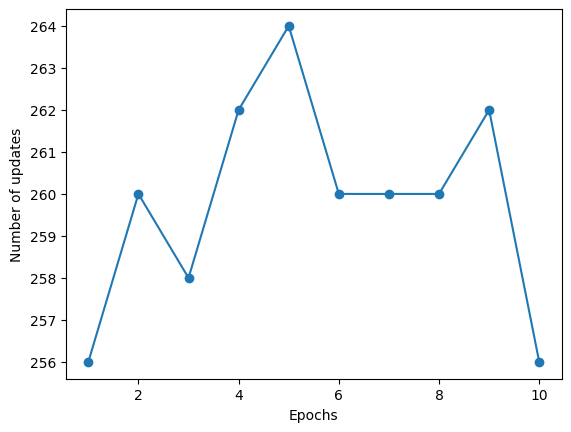

In [5]:
import numpy as np  # operaciones con matrices
import pandas as pd # Para manipulación y análisis de datos
import matplotlib.pyplot as plt # Para graficar datos

class Perceptron(object): # Definir la clase Perceptron
    def __init__(self, eta=0.01, n_inter=50, random_state=1): # Se define el constructor
        self.eta = eta                    # Tasa de aprendizaje
        self.n_inter = n_inter            # Número de iteraciones (épocas)
        self.random_state = random_state  # Estado aleatorio para inicializar pesos

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)  # Crea un generador de números aleatorios
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Pesos iniciales
        self.errors_ = []  # Lista para almacenar el número de errores por cada época.

        for _ in range(self.n_inter):  # Bucle externo sobre el número de épocas.
            errors = 0  # Resetea el contador de errores en cada época.
            for xi, target in zip(X, y):  # Bucle interno sobre todas las muestras del conjunto de datos.
                update = self.eta * (target - self.predict(xi))  # Calcula la actualización de los pesos según el error.
                self.w_[1:] += update * xi  # Actualiza los pesos correspondientes a las características.
                self.w_[0] += update  # Actualiza el sesgo del perceptrón.
                errors += int(update != 0.0)  # Cuenta los errores de predicción en esa época.
            self.errors_.append(errors)  # Guarda el número de errores al final de cada época.
        return self  # Devuelve el perceptrón entrenado.

    def net_input(self, X): #se define ner_imput
        return np.dot(X, self.w_[1:]) + self.w_[0]  # Calcula la entrada neta (producto punto de las características y pesos más el sesgo).

    def predict(self, X):  # se define predict
        return np.where(self.net_input(X) >= 0.0, 1, -1)  # Realiza la predicción comparando la entrada neta con un umbral (0).

# Cargar el conjunto de datos
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data', header=None, delim_whitespace=True)

# Seleccionar dos clases para simplificar
# La clase está en la columna 9
df = df[(df[9] == 'CYT') | (df[9] == 'NUC')]

# Convertir etiquetas a valores binarios: '
y = np.where(df[9].values == 'CYT', -1, 1)

# Extraer dos característica
X = df.iloc[:, [1, 2]].values

# Graficar los datos
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='green', marker='o', label='CYT')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='NUC')

plt.xlabel('Característica 1') #etiqueta eje x
plt.ylabel('Característica 2')  #etiqueta eje y
plt.legend(loc='upper left')
plt.show()  #muestra el grafico generado

# Entrenar el modelo de perceptrón
ppn = Perceptron(eta=0.1, n_inter=10)  # Tasa de aprendizaje 0.1 y 10 épocas
ppn.fit(X, y)  # Ajustar el modelo con los datos X e y

# Graficar los errores durante las épocas
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()  #muestra el grafico generado
